**Feature selection**

🎯 Global Metrics
F1 Score (Macro): 0.8561
Accuracy: 0.9791
Recall (Macro): 0.7629

📋 Classification Report (Per Class):
               precision    recall  f1-score   support

           OK       0.98      1.00      0.99     17617
      calving       0.97      0.78      0.87       150
     lameness       0.99      0.65      0.78       103
     mastitis       1.00      0.75      0.86       101
      oestrus       1.00      0.66      0.79       710
other_disease       0.99      0.74      0.85       191

     accuracy                           0.98     18872
    macro avg       0.99      0.76      0.86     18872
 weighted avg       0.98      0.98      0.98     18872



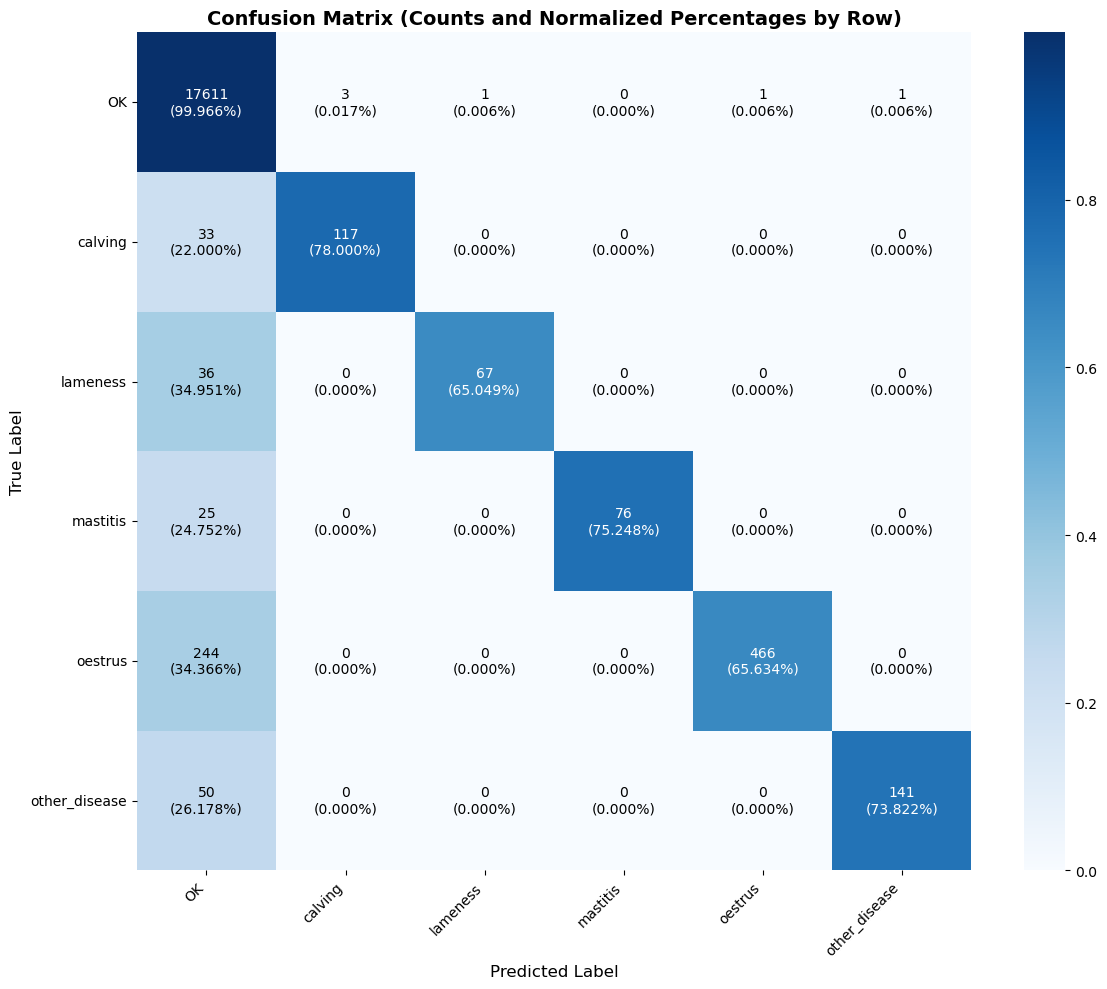

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, classification_report,
                             f1_score, accuracy_score, recall_score)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\rouat\Downloads\final_selected_features_dataset_1.csv")

# Drop unnecessary columns
df.drop(columns=['start_time', 'end_time', 'cow'], errors='ignore', inplace=True)

# Split: 90% for training/validation, 10% set aside
df_train_val, df_unused = train_test_split(df, test_size=0.1, random_state=42)
df_unused.to_csv(r"C:\Users\rouat\Downloads\unused_data_dataset1.csv", index=False)

# Multi-class target creation
target_cols = ['oestrus', 'mastitis', 'calving', 'lameness', 'other_disease', 'OK']
df_train_val['target'] = df_train_val[target_cols].idxmax(axis=1)

# Label encoding
le = LabelEncoder()
y_encoded = le.fit_transform(df_train_val['target'])

# Split into features and labels
X = df_train_val.drop(columns=target_cols + ['target'])
y = y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(target_cols),
    eval_metric='mlogloss',
    random_state=42,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.9
)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Global metrics
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')

print("🎯 Global Metrics")
print(f"F1 Score (Macro): {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Macro): {recall:.4f}\n")

# Classification report
print("📋 Classification Report (Per Class):")
print(classification_report(y_test, y_pred, target_names=le.classes_))


cm = confusion_matrix(y_test, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot with counts and normalized percentages
plt.figure(figsize=(12, 10))
sns.heatmap(cm_normalized, annot=False, cmap='Blues', cbar=True)


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j+0.5, i+0.5, f"{cm[i, j]}\n({cm_normalized[i,j]*100:.3f}%)",
                 ha='center', va='center',
                 fontsize=10,
                 color='white' if cm_normalized[i,j] > 0.5 else 'black')

# Tick labels
plt.xticks(np.arange(len(le.classes_)) + 0.5, le.classes_, rotation=45, ha='right')
plt.yticks(np.arange(len(le.classes_)) + 0.5, le.classes_, rotation=0)
plt.title('Confusion Matrix (Counts and Normalized Percentages by Row)', fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()


🎯 Global Metrics on Unseen Data
F1 Score (Macro): 0.8532
Accuracy: 0.9788
Recall (Macro): 0.7604

📋 Classification Report on Unseen Data (Per Class):
               precision    recall  f1-score   support

           OK       0.98      1.00      0.99      9786
      calving       0.97      0.76      0.85        79
     lameness       1.00      0.58      0.74        48
     mastitis       1.00      0.76      0.86        66
      oestrus       0.99      0.64      0.78       404
other_disease       1.00      0.82      0.90       102

     accuracy                           0.98     10485
    macro avg       0.99      0.76      0.85     10485
 weighted avg       0.98      0.98      0.98     10485



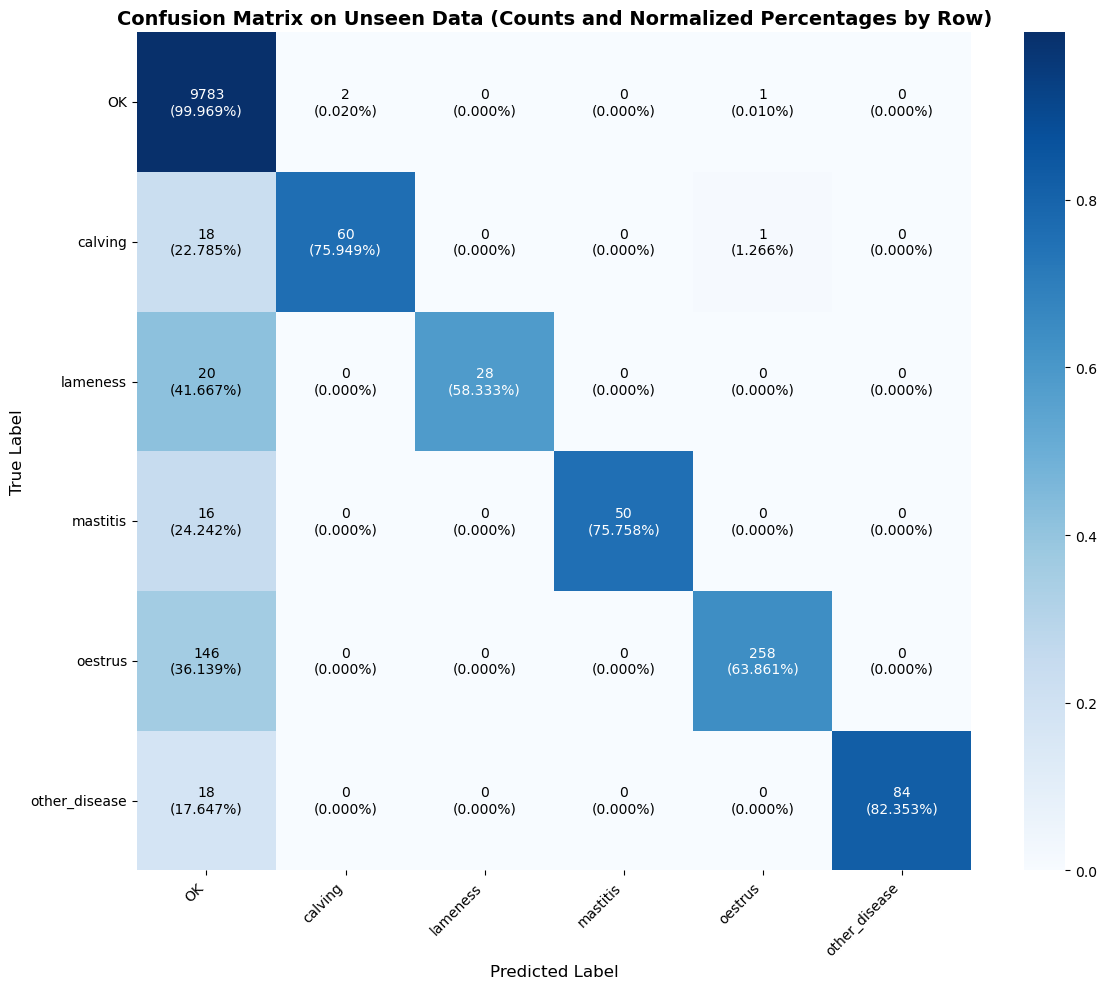

In [ ]:
# Charger les données non utilisées
df_unseen = pd.read_csv(r"C:\Users\rouat\Downloads\unused_data_dataset1.csv")

df_unseen['target'] = df_unseen[target_cols].idxmax(axis=1)
y_unseen_encoded = le.transform(df_unseen['target'])

# Séparation features/labels
X_unseen = df_unseen.drop(columns=target_cols + ['target'])
y_unseen = y_unseen_encoded

# Prédiction sur les données unseen
y_unseen_pred = model.predict(X_unseen)

# Métriques globales sur unseen data
f1_unseen = f1_score(y_unseen, y_unseen_pred, average='macro')
accuracy_unseen = accuracy_score(y_unseen, y_unseen_pred)
recall_unseen = recall_score(y_unseen, y_unseen_pred, average='macro')

print("\n🎯 Global Metrics on Unseen Data")
print(f"F1 Score (Macro): {f1_unseen:.4f}")
print(f"Accuracy: {accuracy_unseen:.4f}")
print(f"Recall (Macro): {recall_unseen:.4f}\n")

# Rapport de classification
print("📋 Classification Report on Unseen Data (Per Class):")
print(classification_report(y_unseen, y_unseen_pred, target_names=le.classes_))

# Matrice de confusion pour unseen data
cm_unseen = confusion_matrix(y_unseen, y_unseen_pred)
cm_unseen_normalized = cm_unseen.astype('float') / cm_unseen.sum(axis=1)[:, np.newaxis]

# Visualisation
plt.figure(figsize=(12, 10))
sns.heatmap(cm_unseen_normalized, annot=False, cmap='Blues', cbar=True)


for i in range(cm_unseen.shape[0]):
    for j in range(cm_unseen.shape[1]):
        plt.text(j+0.5, i+0.5, f"{cm_unseen[i, j]}\n({cm_unseen_normalized[i,j]*100:.3f}%)",
                 ha='center', va='center',
                 fontsize=10,
                 color='white' if cm_unseen_normalized[i,j] > 0.5 else 'black')

plt.xticks(np.arange(len(le.classes_)) + 0.5, le.classes_, rotation=45, ha='right')
plt.yticks(np.arange(len(le.classes_)) + 0.5, le.classes_, rotation=0)
plt.title('Confusion Matrix on Unseen Data (Counts and Normalized Percentages by Row)',
          fontsize=14, weight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

**Data Preparation for Training and Testing**

**Running XGBoost with Hyperparameter Tuning**